# Plotting Speed,RPM as scatter plot

C:\Miniconda3\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<IPython.core.display.Javascript object>


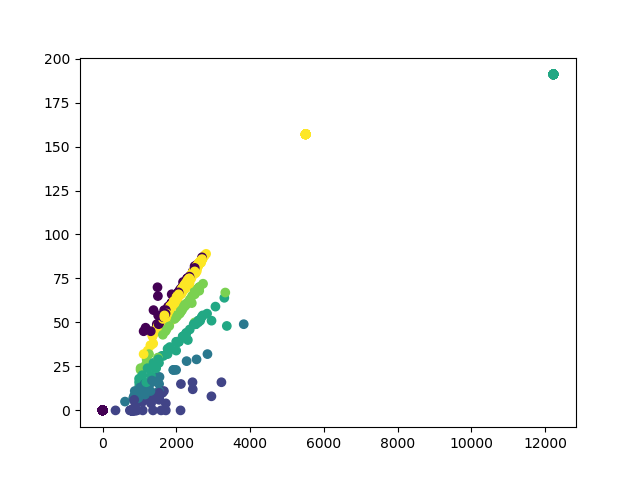

[]

In [2]:
import numpy as np
import pandas as pd
"""
A frmework script that tags the data points according to the gear and assigns it a color and plots the data. 
The gear detection is done by assuming the borders generated using any of the algorithms and placed in
the borders array. 
"""

%matplotlib notebook
import matplotlib.pyplot as plt


def get_gear(entry, borders):
    if entry['rpm'] == 0:
        return 0
    rat = entry['speed'] / entry['rpm'] * 1000
    if np.isnan(rat) or np.isinf(rat):
        return 0
    for i in range(0, len(borders)):
        if rat < borders[i] :
            return i + 1
    return 0

num_trips = 10
df = pd.read_csv("1.csv", index_col=0)
obddata = df[df['tripID']<num_trips]

# borders = get_segment_borders(obddata)
borders = [7.070124715964856, 13.362448319790191, 19.945056624926686, 27.367647318253834, 32.17327586520911]

obddata_wgears = obddata
obddata_wgears['gear'] = obddata.apply(lambda x : get_gear(x, borders), axis=1)

# print(obddata_wgears)

colors = [x * 50 for x in obddata_wgears['gear']]
plt.scatter(obddata_wgears['rpm'], obddata_wgears['speed'], c=colors)
plt.plot()